# CIFAR100 Image Classifier

#### This notebook gives an overview of training an image classifier for the CIFAR 100 dataset

### MODEL ARCHITECTURE
**C : Convolution  
A : Activation  
MP: MaxPooling  
DO: Dropout  
F: Faltten  
D: Dense  
CL: OutputClasses**

#### CONFIG A (Intuition)
A basic intuituion in deciding the sizes and layers was to gradually increase the number of filters at each layer and ultimately faltten the layers and give the output size as the number of classes that the dataset contains.  

The last 0.3 part of the training data is used as validation data.

**Architecture: C(32)->A->MP(2x2)->C(64)->A->MP(2x2)->DO(0.1)->C(128)->A->MP(2x2)>DO(0.25)->F->D(512)->A->DO(0.5)->CL(100)**   
**Optimizer: SGD**  
**Epochs: 30**  
**Batchsize: 100**  
**Loss(validation): 3.2751% Accuracy(validation): 0.2207**

![](g1.JPG)
Fig1. (a)training accuracy (b)training loss(%) (c) validation_accuracy (d) validation_loss(%)  
[all graphs have epochs as the x axis]

This configuration had a large batch size which resulted in faster progress in training, but does not always guarantee fast convergence which can be seen above.

#### CONFIG B (Batch and Epoch changes)
  
The batch size was reduced and the number of epochs increased.  

**Architecture: C->MP->C->MP->DO->C->MP>DO->F->D->DO->CL**  
**Dropouts: 0.1 -> 0.25 -> 0.5**  
**Optimizer: SGD**  
**Epochs: 50**  
**Batchsize: 50**  
**Loss(validation): 2.397% Accuracy(validation): 0.3981**

![](g2.JPG)
Fig2. (a)training accuracy (b)training loss(%) (c) validation_accuracy (d) validation_loss(%)  
[all graphs have epochs as the x axis]

The change in number of epochs and batch size resulted in improved accuracy. It can be seen that the accuracy was still increasing and had not yet reached a plateau, so the number of epochs have to be increased further.

#### CONFIG C (Adam Optimizer and increased epochs)
Number of epochs were increased and the the otimizer was changed to Adam to test if it gives better convergence.    

**Architecture: C->MP->C->MP->DO->C->MP>DO->F->D->DO->CL**  
**Dropouts: 0.1 -> 0.25 -> 0.5**  
**Optimizer: Adam**  
**Epochs: 100**  
**Batchsize: 50**  
**Loss(validation): 2.7191% Accuracy(training): 0.75 Accuracy(validation): 0.4309**

![](g3.JPG)
Fig3. (a)training accuracy (b)training loss(%) (c) validation_accuracy (d) validation_loss(%)  
[all graphs have epochs as the x axis]

The training accuracy is greatly improved due to the increased epochs. Validation losses erratic behaviour, sudednly increasing after hitting a minima even while the validation accuracy remains almost constant. This indicates that the model gets better at identifying the training data, but gets worse at classifying new data(validation), which inturn indicates that the model is overfitting to the training data.

#### CONFIG D  (Increased Dropouts to prevent overfitting)
To prevent overfitting, we need to reduce the number of parameters. One way of doing this is by increasing the dropout rate. So the dropout rate is increased in all the layers to be 0.5. Epochs is reduced to save training time as the accuracy reaches a considerably stable percetage around 50 epochs.  

**Architecture: C->MP->C->MP->DO->C->MP>DO->F->D->DO->CL**  
**Dropouts: 0.5 -> 0.5 -> 0.5**  
**Optimizer: Adam**  
**Epochs: 50**  
**Batchsize: 50** 
**Loss(validation): 2.4% Accuracy(validation): 0.425**

![](g4.JPG)
Fig4. (a)training accuracy (b)training loss(%) (c) validation_accuracy (d) validation_loss(%)  
[all graphs have epochs as the x axis]

Dropout infact reduced the problem of overfitting as can be seen in the validation losses. Increasing the number of epochs can possibly improve the accuracy even more.

Data augmentation may also help in training a more generalised classifier.

#### CONFIG E (ELU activation and Regularization)
To try out other acitvation functions, I tried ELU. ELU is said to haveing improved learning characteristics [FAST AND ACCURATE DEEP NETWORK LEARNING BY EXPONENTIAL LINEAR UNITS (ELUS)](https://arxiv.org/pdf/1511.07289.pdf) for CIFAR100 without batch normalizations. I also introduced another stack of C->MP->DO layer. L2 regularization was used with 0.005 penalty.

**Architecture: C(32)->A->MP(2x2)->C(64)->A->MP(2x2)->DO(0.5)->C(128)->A->MP(2x2)>DO(0.5)->C(128)->A->MP(2x2)->DO(0.5)->F->D(512)->A->DO(0.5)->CL(100)**  
**Dropouts: 0.5 -> 0.5 -> 0.5**  
**Optimizer: ELU**  
**Epochs: 70**  
**Batchsize: 50** 
**Loss(validation): 2.4% Accuracy(validation): 0.445**

![](g5.jpg)
Fig6. (a)training accuracy (b)training loss(%) (c) validation_accuracy (d) validation_loss(%)  
[all graphs have epochs as the x axis]

Using ELU did not show drastic improvements. This could have been due to the different architecture as proposed in [FAST AND ACCURATE DEEP NETWORK LEARNING BY EXPONENTIAL LINEAR UNITS (ELUS)](https://arxiv.org/pdf/1511.07289.pdf). One change that was observed was significatly faster convergence, probably due to the presence of regularization. Each epoch took half the time it previouly took took complete.

#### CONFIG F (Removing Regularization from E)
Removing regularization increased the processing time a bit but showed no significant change in the accuracy.
![](g6.jpg)
Fig7. (a)training accuracy (b)training loss(%) (c) validation_accuracy (d) validation_loss(%)  
[all graphs have epochs as the x axis]

#### CONFIG G (Changing number of filters)
Keeping all configurations same as in F, the number of filters were changed to 64->128->128->256->512
![](g7.jpg)
Fig7. (a)training accuracy (b)training loss(%) (c) validation_accuracy (d) validation_loss(%)  
[all graphs have epochs as the x axis]

There was a slight improvement of about 4% and it seemed to increase steadily.

#### CONFIG H
Since CONFIG D showed the most promising results, I ran it for 80 epoccs this time and 0.15 validation split it showed consistent performance and a slight increase in performance with **0.4 training accuracy and 0.45 validation accuracy**.

![](g8.jpg)
Fig8. (a)training accuracy (b)training loss(%) (c) validation_accuracy (d) validation_loss(%)  
[all graphs have epochs as the x axis]

### PYTHON CODE (Keras with Tensorflow backend)

Matplotlib libraries wont work on non GUI systems.

Set Keras backend to follow dimension ordering as supported by Tensorflow.  
Storing all the generated metrics in /Performance deirectory to be viewed in TensorBoard.

In [3]:
import os
import numpy as np
import keras
keras.backend.set_image_dim_ordering('tf')
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Performance', histogram_freq=0,
                                         write_graph=True, write_images=True)

Using TensorFlow backend.


### Import Data

Import cifar100 dataset provided in Keras.  
Convert the data to _float32_ and normalise.

In [4]:
from keras.datasets import cifar100
def import_data():
    """
    Preprocess cifar100 data by normalising and converting it to float32.
    Returns:
        list
            a list of training data and test data (x,y,x,y).
    """
    (x_train, y_train), (x_test, y_test) = cifar100.load_data()
    print("Train data size: " + str(x_train.shape[0]))
    print("Test data size: " + str(x_test.shape[0]))
    y_train = keras.utils.to_categorical(y_train, 100)
    y_test = keras.utils.to_categorical(y_test, 100)
    # convert to float ndarray
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    # normalize
    x_train /= 255.
    x_test /= 255.
    return [x_train, y_train, x_test, y_test]

### Model (CONFIG D/H)

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
def get_model(output_size, input_shape, opt, dropout = 0):
    """
    Returns a model based on the given parameters and the underlying architecture.
    Input:
        output_size: the size of the output (the number of classe in this case)
        input_shape: the shape of the input to the first conv layer
        opt: the optimizer to be used
        dropout: an integer flag representing wheter or not to use drop out. default at 0(false) 
    Returns:
        A model with the above specifications and following architecture:
        C->MP->C->MP->DO->C->MP>DO->F->D->DO->CL                
    """

    C1 = Conv2D(32, (3, 3), padding='same',input_shape=input_shape)
    MP1 = MaxPooling2D(pool_size=(2, 2))

    C3 = Conv2D(64, (3, 3), padding='same')
    MP2 = MaxPooling2D(pool_size=(2, 2))
    DO1 = Dropout(0.5)

    C5 = Conv2D(128, (3, 3), padding='same')
    MP3 = MaxPooling2D(pool_size=(2, 2))  
    DO2 = Dropout(0.5)

    F1 = Flatten()
    D1 = Dense(512)
    DO3 = Dropout(0.5)
    
    CL = Dense(output_size)

    model = Sequential()
    
    model.add(C1)
    model.add(MP1)
    model.add(Activation('relu'))

    model.add(C3)
    model.add(MP2)
    model.add(Activation('relu'))
    if dropout !=0:
        model.add(DO1)

    model.add(C5)
    model.add(Activation('relu'))
    model.add(MP3)
    if dropout !=0:
        model.add(DO2)    

    model.add(F1)
    model.add(D1)
    model.add(Activation('relu'))
    if dropout !=0:
        model.add(DO3)
        
    model.add(CL)
    model.add(Activation('softmax'))
    
    return model

### Import data

In [6]:
data = import_data()
#training data
x_train = data[0]
y_train = data[1]
#validation data
val_data_x = data[0][35000:50000]
val_data_y = data[1][35000:50000]

Train data size: 50000
Test data size: 10000


### Compile model

In [7]:
output_size = 100
input_shape=data[0].shape[1:]
# opt = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
loss='categorical_crossentropy'
dropout = 0 #(0 for false 1 for true)

my_model = get_model(output_size, input_shape, opt, dropout)
my_model.compile(loss=loss,
          optimizer=opt,
          metrics=['accuracy'])

### Train model and save weights (Run this only for training)

In [8]:
epochs = 50
batch_size = 50
# train model
my_model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_split=0.3,
                  shuffle=True,
                  callbacks=[tbCallBack])
# save weights
import pickle
import h5py

my_model.save_weights('weightsfull.h5')

Train on 35000 samples, validate on 15000 samples
Epoch 1/50
 2650/35000 [=>............................] - ETA: 59s - loss: 4.5502 - acc: 0.0204

KeyboardInterrupt: 

### Validate data without dropout layers
The same model is compiled again without the droupout layers to check if the validation data yields the same accuracy results.  

In [9]:
dropout = 0
val_model = get_model(output_size, input_shape, opt, dropout)
val_model.load_weights('weightsfull.h5')
val_model.compile(loss=loss,
          optimizer=opt,
          metrics=['accuracy'])
val_res = val_model.evaluate(val_data_x, val_data_y, batch_size=50, verbose=1)
print(val_res)

14950/15000 [============================>.] - ETA: 0s[2.2099895938237508, 0.43473333239555356]


**The loss percentage for the validation data set comprising of the last 15000 elements of the training data is 2.21% and the accuracy is 43.5%. This was achieved with CONFIG D**

### Testing the Model
We will use the same model wihout the dropout layers for testing as dropout is introduced only to prevent overfitting while training the model.

In [10]:
test_data_x = data[2]
test_data_y = data[3]
test_res = val_model.evaluate(test_data_x, test_data_y, batch_size=50, verbose=1)
print(test_res)

 9950/10000 [============================>.] - ETA: 0s[2.1848915326595306, 0.44089999899268151]


**The loss percentage for the test data set comprising of the 10000 elements of the test data is 2.185% and the accuracy is 41.1%. This was achieved with CONFIG D**

#### Predicted results

In [ ]:
# predict test data
test_results = []
for i in range(len(test_data_x)):
    test_results.append(val_model.predict(test_data_x[i:i+1], verbose=1))

# select max value from the probablility vector of 100 classes
pred = []
flat_pred =[]
for p in (test_results):
    pred.append(p[0].argsort()[-1:][::-1])
#flatten the list of list into a list
for sublist in pred:
    for item in sublist:
        flat_pred.append(item)


#### Actual labels

In [ ]:
# actual labels
act = []
flat_act = []
for a in test_data_y:
    act.append(a.argsort()[-1:][::-1])
#flatten the list of list into a listfor sublist in act:
    for item in sublist:
        flat_act.append(item)

#### Create confusion matrix

In [ ]:
import tensorflow as tf
conf_mat = tf.contrib.metrics.confusion_matrix(np.asarray(flat_act, dtype=np.float32), np.asarray(flat_pred, dtype=np.float32), 100, dtype=np.float32)
print(conf_mat)

#### Displaying the confusion matrix for CONFIG D

In [ ]:
# convert tensor to numpy array for displaying
to_print = tf.Session().run(conf_mat)
import matplotlib as mp
import matplotlib.pyplot as plot
mp.rcParams['figure.figsize'] = (10,10)

ax = plot.subplot(111)
plot.imshow(np.asarray(to_print, dtype=np.float32))
plot.xlabel('Predicted Fine Class', fontsize=16)
plot.ylabel('Actual Fine Class', fontsize=16)

plot.colorbar(fraction=0.046, pad=0.04)
plot.show()

![](conf.JPG)
Fig5. The confusion matrix created by predicting the test data.


This confusion matrix represents a 100x100 matrix of the predictions vs the actual label for the test data. Each cell in the diagonal represents the correct number of predcitions. The total number of correct predictions for a class go into the actual row for that class value and the predicted column for that class value. The brighter color represents higher value which indicates higher correct predictions. This indicates that the classifier is performing well.

### Testing on images outside the dataset

In [13]:
# http://corochann.com/cifar-10-cifar-100-dataset-introduction-1258.html
CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

#### Predict external image
Testing with data from outside the CIFAR100 dataset

In [34]:
def PIL2array(img):
    return np.array(img.getdata(),
                    np.uint8).reshape(img.size[1], img.size[0], 3)

def predict_custom_image(label, path):
    """
    Predicts the CIFAR100 class of a given 32X32 image
    Input:
        lable: label for the input image (should be from CIFAR fine labels)
        path: path of the input image        
    """
    # plot the image
    from PIL import Image
    img_ori =Image.open(path)
    import matplotlib as mp
    import matplotlib.pyplot as plot
    mp.rcParams['figure.figsize'] = (6,6)
    
    # process
    img = Image.open(path)
    img = img.resize((32,32), Image.ANTIALIAS)
     
    ax = plot.subplot(111)
    plot.imshow(img_ori)
#     ax = plot.subplot(122)
#     plot.imshow(img)
    plot.show()

    img = np.array(img)
    img = np.asarray([img])
    predicted = val_model.predict(img)[0].argsort()[-5:][::-1]

    print("Actual: ",  label)
    print("Predicted: " ,predicted[0], CIFAR100_LABELS_LIST[predicted[0]]) 
    print("Next 4:",
          CIFAR100_LABELS_LIST[predicted[1]], 
          CIFAR100_LABELS_LIST[predicted[2]], 
          CIFAR100_LABELS_LIST[predicted[3]],
         CIFAR100_LABELS_LIST[predicted[4]])
    

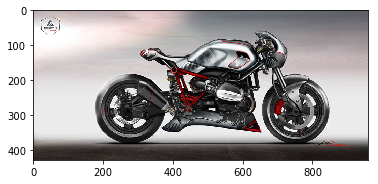

Actual:  motorcycle
Predicted:  48 motorcycle
Next 4: hamster crab crocodile cup


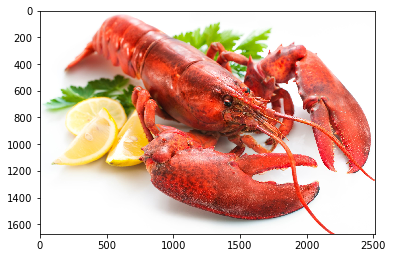

Actual:  lobster
Predicted:  54 orchid
Next 4: rose worm hamster crocodile


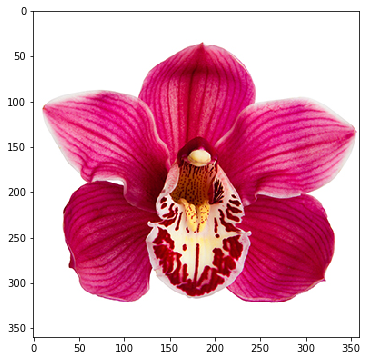

Actual:  orchid
Predicted:  54 orchid
Next 4: worm hamster crab crocodile


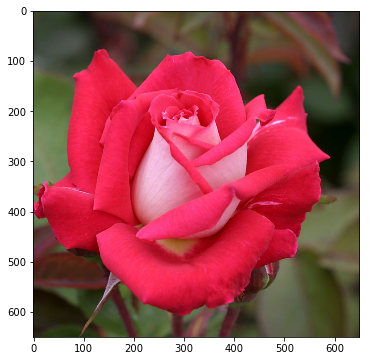

Actual:  rose
Predicted:  70 rose
Next 4: worm girl crab crocodile


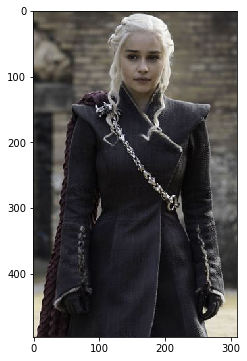

Actual:  girl
Predicted:  39 keyboard
Next 4: worm hamster crab crocodile


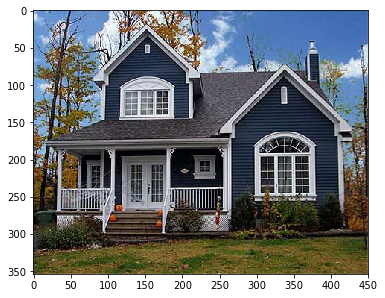

Actual:  house
Predicted:  37 house
Next 4: clock hamster crocodile cup


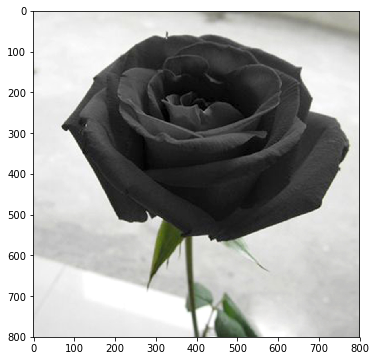

Actual:  rose
Predicted:  86 telephone
Next 4: worm crab crocodile cup


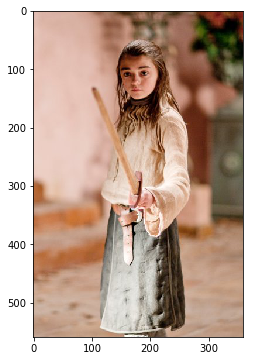

Actual:  girl
Predicted:  54 orchid
Next 4: worm hamster crab crocodile


In [35]:
predict_custom_image("motorcycle", 'motor.jpg') 
predict_custom_image("lobster", 'lobster.jpg') ## Predicts orchid based on the shape of the petals
predict_custom_image("orchid", 'orchid.jpg') 
predict_custom_image("rose", 'rose.jpg')  
predict_custom_image("girl", 'dany.jpg') ## Predicted keyboard using the checkered pattern on the walls
predict_custom_image("house", 'house.jpg') 
predict_custom_image("rose", 'black_rose.jpg') ## Predicted as telephone, uses color to predict rose, hence cannot identify it
predict_custom_image("girl", 'arya.jpg') ## Always confuses arya for orchids!

#### Predict images from CIFAR test data

In [ ]:
def predict_cifar_img(im_num):
    """
    Predicts the given image number from CIFAR100 data set
    """
    # extract the image
    img = test_data_x[im_num]
    # extract the image label
    actual = test_data_y[im_num].argsort()[-1:][::-1]
    # plot the image
    import matplotlib as mp
    import matplotlib.pyplot as plot
    mp.rcParams['figure.figsize'] = (3,3)
    ax = plot.subplot(111)
    plot.imshow(img)
    plot.show()


    img = np.asarray([img])
    predicted = val_model.predict(img)[0].argsort()[-1:][::-1]

    print("Image number: ", im_num)
    print("Predicted class:" ,predicted[0], CIFAR100_LABELS_LIST[predicted[0]])
    print("Actual class:", actual[0],  CIFAR100_LABELS_LIST[actual[0]])

#### Predicting random images from CIFAR100 test data

In [ ]:
def predict_random_cifar(num_img, random, skip):
    """
    Input:
        num_img: number of images to predict
        random: a random number to select random images
        skip: another random number 
    Precondition:
        num_img*random+skip < 10000
    """
    import matplotlib as mp
    import matplotlib.pyplot as plot
    # print the images and predictions
    for i in range(num_img):
        # display original
        ax = plot.subplot(1, num_img, i + 1)
        predict_cifar_img(i*random+skip)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    # plot.tight_layout()
    plot.show()


In [ ]:
predict_random_cifar(5, 683, 9)

![](pred_1.jpg)

#### Some false results

![](false1.jpg) 